# Exploratory Data Analysis on Gym Members Exercise dataset           

Name : Jolly Soni                                                             


## Introduction: 
This project explores the relationship between key physical and demographic factors—such as age, gender, and body composition (BMI)—and fitness metrics like calories burned, workout frequency, and hydration needs. Using a dataset that includes metrics such as heart rate, BMI, water intake, and calorie burns, the analysis aims to identify patterns that can guide fitness recommendations for groups of individuals with similar characteristics.

The primary goal of this project was to address the question: "How can we design effective workout and hydration strategies for different BMI categories, age groups, and genders based on observed data trends?" While not fully personalized, these recommendations are tailored to broader population groups, offering actionable insights that reflect the general tendencies observed in the dataset.

The analysis addresses the following key questions:

*What gender prefers which Workout the most?*

*How do calorie burns vary across BMI ranges and genders?*

*What workout frequencies and hydration needs align with different BMI categories?*

*What types of workouts are most effective for specific BMI and demographic groups?*

The insights derived are meant to serve as a starting point for individuals looking to optimize their fitness based on general trends. While these recommendations are not personalized, they provide a solid foundation for making informed decisions about fitness planning. The results highlight the importance of tailoring strategies to broader physical and demographic characteristics, bridging the gap between generic advice and fully individualized fitness plans.

In [2]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # Make visuals more appealing
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [3]:
#Loading the dataset
df = pd.read_csv('gymdata.csv')

# Displaying the First Few Rows
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180.0,157.0,60.0,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179.0,151.0,66.0,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167.0,NaN,54.0,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,NaN,190.0,164.0,NaN,NaN,532,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188.0,158.0,68.0,0.64,556,Strength,NaN,2.8,3,1,14.39


### Data understanding and Cleaning -

In [4]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    972 non-null    float64
 3   Height (m)                     969 non-null    float64
 4   Max_BPM                        969 non-null    float64
 5   Avg_BPM                        968 non-null    float64
 6   Resting_BPM                    968 non-null    float64
 7   Session_Duration (hours)       970 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 969 non-null    float64
 11  Water_Intake (liters)          972 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [5]:
# Summary statistics 
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,972.000000,969.000000,969.000000,968.000000,968.000000,970.000000,973.000000,969.000000,972.000000,973.000000,973.000000,968.000000
mean,38.683453,73.856687,1.722817,179.854489,143.750000,62.332645,1.257443,905.422405,24.976161,2.625514,3.321686,1.809866,24.916983
std,12.180928,21.218325,0.127795,11.527208,14.334153,7.580856,0.342795,272.641516,6.255330,0.599491,0.913047,0.739693,6.670880
min,18.000000,40.000000,1.500000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.620000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,69.950000,1.710000,180.000000,143.000000,63.000000,1.270000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.025000,1.800000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.567500
max,59.000000,129.900000,2.000000,199.000000,169.000000,110.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [6]:
# Checking for missing/null values
missing_value = df.isnull().sum
print("Missing values in each column:\n", missing_value)

Missing values in each column:
 <bound method NDFrame._add_numeric_operations.<locals>.sum of        Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0    False   False        False       False    False    False        False   
1    False   False        False       False    False    False        False   
2    False   False        False       False    False     True        False   
3    False   False        False        True    False    False         True   
4    False   False        False       False    False    False        False   
..     ...     ...          ...         ...      ...      ...          ...   
968  False   False        False       False    False    False        False   
969  False   False        False       False    False    False        False   
970  False   False        False       False    False    False        False   
971  False   False        False       False    False    False        False   
972  False   False        False       False    F

In [7]:
#Filling missing values through various methods - 

#Fill value with a constant - 18.5(normal bmi of a person who is inactive)
df['BMI'].fillna(18.5,inplace=True)

#Fill values with mean or median
df['Fat_Percentage'].fillna(df['Fat_Percentage'].mean(),inplace=True)
df['Height (m)'].fillna(df['Height (m)'].mean(),inplace=True)
df['Weight (kg)'].fillna(df['Weight (kg)'].median(),inplace=True)
df['Resting_BPM'].fillna(df['Resting_BPM'].median(),inplace=True)

# Fill values with ffill
df['Avg_BPM'].fillna(method='ffill',inplace=True)

#Fill values with bfill
df['Session_Duration (hours)'].fillna(method='bfill',inplace=True)
df['Max_BPM'].fillna(method='bfill',inplace=True)

#Drop rows which has missing value
df.dropna(subset=['Water_Intake (liters)'], inplace=True) 

#check after filling the values
df.isnull().mean() * 100

Age                              0.0
Gender                           0.0
Weight (kg)                      0.0
Height (m)                       0.0
Max_BPM                          0.0
Avg_BPM                          0.0
Resting_BPM                      0.0
Session_Duration (hours)         0.0
Calories_Burned                  0.0
Workout_Type                     0.0
Fat_Percentage                   0.0
Water_Intake (liters)            0.0
Workout_Frequency (days/week)    0.0
Experience_Level                 0.0
BMI                              0.0
dtype: float64

## Exploratory Data Analysis

### Calories Burned: A Comparison Across Workout Types

In [8]:
# Average calories burned by workout type
average_calories_by_workout = df.groupby('Workout_Type')['Calories_Burned'].mean().reset_index()

# Displaying the table
print("Average Calories Burned by Workout Type:\n")
print(average_calories_by_workout.to_string(index=False))

print("--------------------------------------------------------------")



Average Calories Burned by Workout Type:

Workout_Type  Calories_Burned
      Cardio       884.019685
        HIIT       925.805430
    Strength       910.697674
        Yoga       903.188285
--------------------------------------------------------------


The analysis of calories burned across different workout types revealed the following key insights:

1.*HIIT (High-Intensity Interval Training)* has the highest average calories burned per session at approximately 925.8 calories, making it the most effective workout for calorie burn.   

2.*Strength Training* and *Yoga* follow closely, with average calories burned being 910.7 and 903.2, respectively.

3.*Cardio* burns the least calories on average, around 884.5, but it remains a popular workout choice, likely due to its accessibility and cardiovascular benefits.

### How Experience Shapes Workout Length? 
(Relationship between experience level and workout duration)

In [9]:
# Median session duration by experience level
median_duration_by_experience = df.groupby('Experience_Level')['Session_Duration (hours)'].median().reset_index()
print("\nMedian Session Duration by Experience Level:")

display(median_duration_by_experience)


Median Session Duration by Experience Level:


,Experience_Level,Session_Duration (hours)
0,1,1.005
1,2,1.260
2,3,1.770


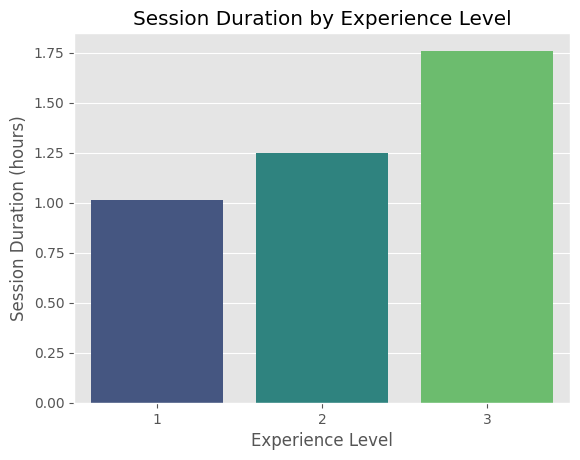

In [10]:
sns.barplot(x='Experience_Level', y='Session_Duration (hours)', data=df, ci=None, palette='viridis')
plt.title('Session Duration by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Session Duration (hours)')
plt.show()

When comparing the session duration based on the members’ experience levels:

1.*Beginners (Experience Level 1)* have a median session duration of 1.005 hours, which is slightly lower compared to more experienced gym-goers.

2.*Intermediate members (Experience Level 2)* work out for a median of 1.260 hours, indicating they may be more consistent or confident with their routines.

3.*Experts (Experience Level 3)* have the longest sessions, with a median duration of 1.770 hours, reflecting their higher endurance and commitment.

### Workout Type Popularity

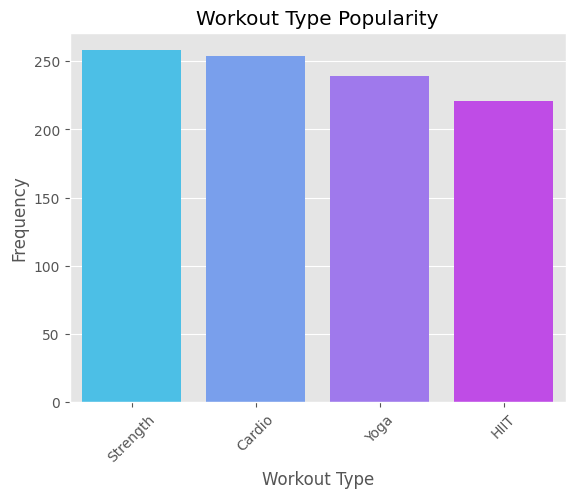

In [11]:
workout_counts = df['Workout_Type'].value_counts()
sns.barplot(x=workout_counts.index, y=workout_counts.values, palette='cool')
plt.title('Workout Type Popularity')
plt.xlabel('Workout Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Analyzing the relationship between water intake and calories burned

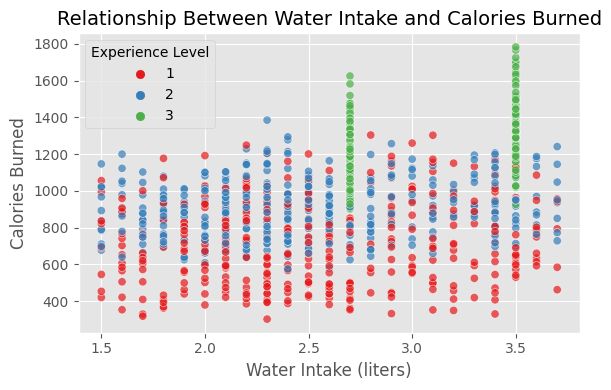

In [12]:
# Checking if 'Water_Intake' and 'Calories_Burned' columns exist
if 'Water_Intake (liters)' in df.columns and 'Calories_Burned' in df.columns:
    # Scatter plot for the relationship
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='Water_Intake (liters)', y='Calories_Burned', data=df, hue='Experience_Level', palette='Set1', alpha=0.7)
    plt.title('Relationship Between Water Intake and Calories Burned', fontsize=14)
    plt.xlabel('Water Intake (liters)', fontsize=12)
    plt.ylabel('Calories Burned', fontsize=12)
    plt.legend(title='Experience Level')
    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain the required columns 'Water_Intake' and 'Calories_Burned'.")


Conclusions from the above scatterplot -

1.There seems to be a positive relationship between water intake and calories burned, particularly for higher experience levels (Level 3). Proper hydration might help improve workout performance and calorie burn.

2.Beginners (Level 1) burn fewer calories irrespective of water intake, indicating that experience level has a stronger impact on performance than hydration alone.

3.Members consuming less than 2 liters of water tend to have lower calorie burns on average, suggesting that maintaining a minimum level of hydration (2+ liters) may be beneficial for workout efficiency.


### Gender difference in Workout preferences

<Figure size 1000x600 with 0 Axes>

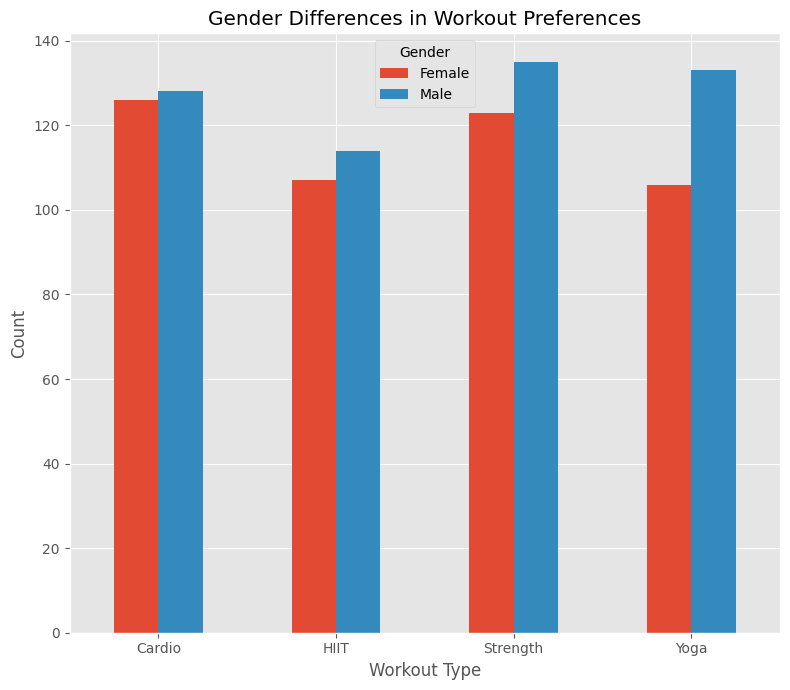

In [13]:
# Using the dataframe to analyze gender differences in workout preferences
gender_workout_preferences = df.groupby(['Gender', 'Workout_Type']).size().reset_index(name='Count')

# Pivot for better visualization
gender_workout_pivot = gender_workout_preferences.pivot(index='Workout_Type', columns='Gender', values='Count').fillna(0)

# Visualizing the gender differences in workout preferences
plt.figure(figsize=(10, 6))
gender_workout_pivot.plot(kind='bar', figsize=(8, 7), rot=0)
plt.title('Gender Differences in Workout Preferences')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


Observations based on above analysis - 

1.Males show higher participation across all workout types in this dataset.

2.Strength training and Cardio remain universally appealing, with a larger male audience but considerable female participation.

3.Yoga has significant male participation, challenging the common stereotype that it is primarily a female-dominated activity.


### Exploring relationships between heart rate metrics , age and BMI.

In [14]:
# Calculate correlation between heart rate metrics and age/BMI
correlations = df[['Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Age', 'BMI']].corr()
print(correlations)


              Max_BPM   Avg_BPM  Resting_BPM       Age       BMI
Max_BPM      1.000000 -0.041985     0.031140 -0.015743  0.058330
Avg_BPM     -0.041985  1.000000     0.063855  0.036271  0.018437
Resting_BPM  0.031140  0.063855     1.000000  0.015483 -0.019076
Age         -0.015743  0.036271     0.015483  1.000000 -0.016285
BMI          0.058330  0.018437    -0.019076 -0.016285  1.000000


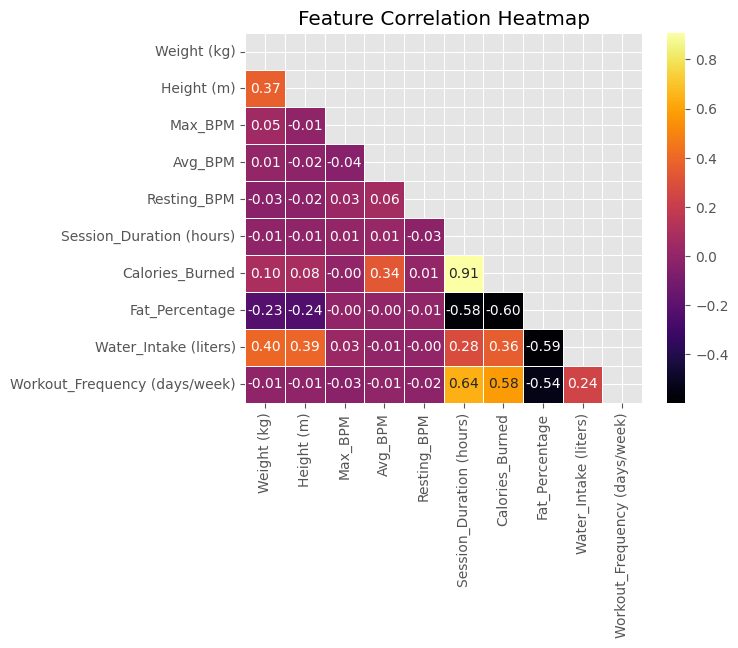

In [15]:
numerical_cols = [
    'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
    'Water_Intake (liters)', 'Workout_Frequency (days/week)'
]

# Calculating correlation matrix
corr = df[numerical_cols].corr()

# Plotting heatmap
sns.heatmap(
    corr, annot=True, cmap='inferno', fmt='.2f',
    mask=np.triu(np.ones_like(corr, dtype=bool)), linewidths=0.5
)
plt.title('Feature Correlation Heatmap')
plt.show()

Conclusions:

1.Maximum, average, and resting BPM are largely uncorrelated, implying they measure distinct aspects of heart performance during workouts.
For example, reaching a high Max BPM doesn't mean someone has a high resting or average BPM.

2.Age does not significantly correlate with any heart rate metrics in this dataset. This is unusual, as max BPM typically decreases with age, but this weak correlation (-0.016) may be due to a limited or unbalanced dataset.

3.The weak positive correlation between BMI and Max BPM (0.060) suggests that individuals with higher BMI might experience slightly elevated maximum heart rates during exercise. However, this is not a strong trend.
BMI has no meaningful relationship with resting or average BPM.

4.Variables like age, BMI, or other heart rate metrics (e.g., Avg_BPM) do not strongly predict Max_BPM, Resting_BPM, or Avg_BPM in this dataset.

### Mean heart rate by gender

In [16]:
# Mean heart rate by gender
gender_heart_rate = df.groupby('Gender')[['Max_BPM', 'Avg_BPM', 'Resting_BPM']].mean()
print(gender_heart_rate)

           Max_BPM     Avg_BPM  Resting_BPM
Gender                                     
Female  179.770563  143.725108    62.272727
Male    179.954902  143.915686    62.401961


- There is no significant difference in maximum BPM, average BPM, or resting BPM between males and females. This suggests that heart rate metrics may not require separate workout intensity adjustments solely based on gender.
- Similar resting BPMs reflect comparable cardiovascular health or training habits among genders in this dataset.

### Identifying Members with High Resting BPM 
A resting BPM above 90 is generally considered elevated for adults. Let's identify individuals with unhealthy heart rates.

In [17]:
high_resting_bpm = df[df['Resting_BPM'] > 90]
print(high_resting_bpm[['Age', 'Gender', 'BMI', 'Resting_BPM']])


    Age  Gender    BMI  Resting_BPM
10   41    Male  43.31         91.0
56   59  Female  28.35        110.0


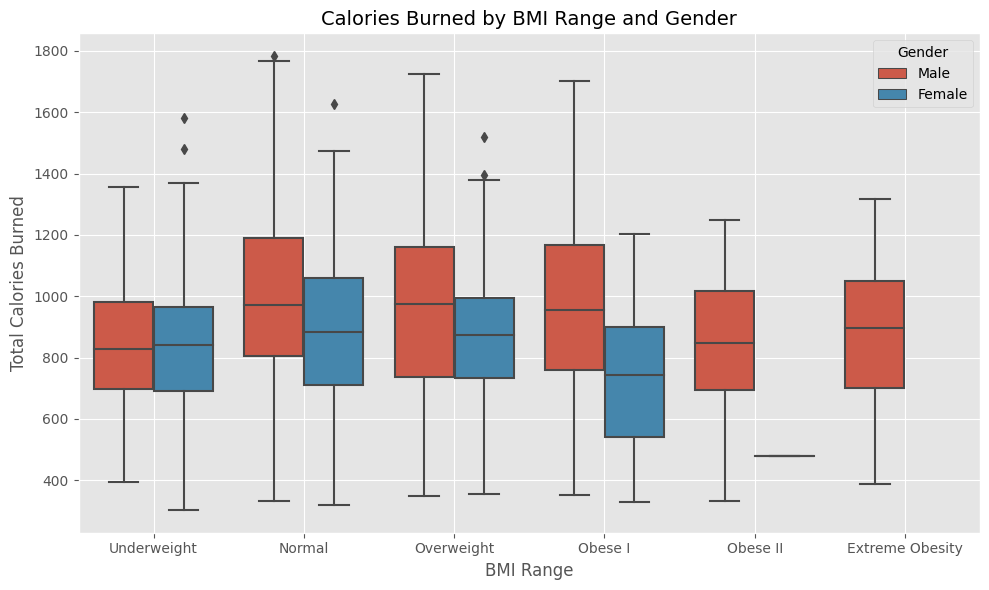

In [18]:
# Group BMI into bins for easier analysis
df['BMI_Range'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 35, 40, 50], labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Extreme Obesity'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='BMI_Range', y='Calories_Burned', hue='Gender')
plt.title('Calories Burned by BMI Range and Gender', fontsize=14)
plt.xlabel('BMI Range', fontsize=12)
plt.ylabel('Total Calories Burned', fontsize=12)
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()


Conclusions based on the above graph - 

1.Males consistently show higher calorie burn medians across most BMI ranges, especially in the "Overweight" and "Obese I" categories.

2.Variability (box height) is higher for males, indicating diverse workout habits.

3.Females show narrower distributions in calorie burn, reflecting more consistent workout habits.

4.Significant outliers are visible in the "Normal" and "Overweight" BMI ranges for males, indicating that some individuals burn significantly more calories than the group average.

### Workout Strategy Based on BMI
- Body Mass Index (BMI) is a useful metric for categorizing individuals into different groups based on weight relative to height.
- Different BMI ranges influence calorie burn rates and workout needs due to variations in body mass, metabolism, and fitness levels.
- This section provides tailored workout strategies for individuals in various BMI ranges, using insights derived from the dataset.

In [31]:
# Group BMI into bins
bmi_bins = [0, 18.5, 25, 30, 35, 40, 50]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Extreme Obesity']

# Add BMI Range column to the dataframe
df['BMI_Range'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

# Summarize data by BMI range
bmi_summary = df.groupby('BMI_Range').agg({
    'Calories_Burned': ['mean', 'std'],
    'Workout_Frequency (days/week)': 'mean',
    'Water_Intake (liters)': 'mean'
}).reset_index()

# Flatten the multi-level column names
bmi_summary.columns = ['BMI_Range', 'Avg_Calories_Burned', 'Calories_STD', 'Avg_Workout_Frequency', 'Avg_Water_Intake']

# Add recommendations based on BMI
bmi_summary['Recommended_Workout_Type'] = bmi_summary['BMI_Range'].apply(
    lambda x: 'Strength Training and Light Cardio' if x == 'Underweight' else
              'Balanced Cardio and Strength Training' if x == 'Normal' else
              'High-Intensity Cardio and Strength Training' if x in ['Overweight', 'Obese I'] else
              'Strength Training with Calorie-Intensive Workouts'
)

# Add hydration and frequency recommendations
bmi_summary['Recommended_Hydration (liters/day)'] = bmi_summary['Avg_Workout_Frequency'].apply(lambda x: round(x * 0.5, 1))
bmi_summary['Recommended_Workout_Hours/Week'] = (bmi_summary['Avg_Workout_Frequency'] * 1.5).round(1)

# Display the summary table
from IPython.display import display, Markdown
display(Markdown("### BMI-Based Workout Recommendations"))
display(bmi_summary)



### BMI-Based Workout Recommendations

,BMI_Range,Avg_Calories_Burned,Calories_STD,Avg_Workout_Frequency,Avg_Water_Intake,Recommended_Workout_Type,Recommended_Hydration (liters/day),Recommended_Workout_Hours/Week
0,Underweight,830.695906,232.003628,3.140351,2.476608,Strength Training and Light Cardio,1.6,4.7
1,Normal,926.818428,281.522949,3.428184,2.572900,Balanced Cardio and Strength Training,1.7,5.1
2,Overweight,919.512500,256.386688,3.391667,2.598333,High-Intensity Cardio and Strength Training,1.7,5.1
3,Obese I,938.702479,328.684617,3.272727,2.900000,High-Intensity Cardio and Strength Training,1.6,4.9
4,Obese II,851.459459,226.108577,3.000000,2.910811,Strength Training with Calorie-Intensive Workouts,1.5,4.5
5,Extreme Obesity,886.794118,245.249629,3.088235,2.850000,Strength Training with Calorie-Intensive Workouts,1.5,4.6


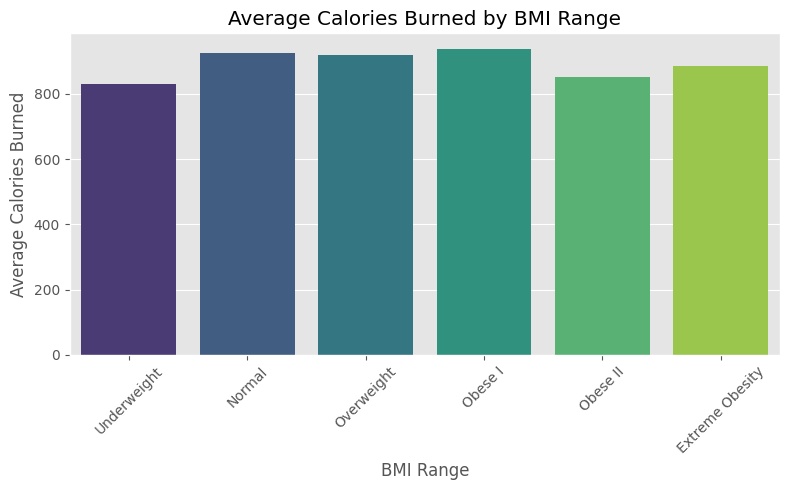

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=bmi_summary, x='BMI_Range', y='Avg_Calories_Burned', palette='viridis')
plt.title('Average Calories Burned by BMI Range')
plt.xlabel('BMI Range')
plt.ylabel('Average Calories Burned')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
workout_recommendations = pd.DataFrame({
    'BMI Range': ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II+'],
    'Workout Strategy': [
        'Strength Training and Light Cardio',
        'Balanced Cardio and Strength Training',
        'High-Intensity Cardio and Strength Training',
        'HIIT and Strength Training',
        'Strength Training with Calorie-Intensive Activities'
    ],
    'Rationale': [
        'To build muscle mass and improve strength.',
        'To maintain cardiovascular health and muscle tone.',
        'To achieve higher calorie burns efficiently.',
        'To maximize calorie burn and build muscle.',
        'To manage workout intensity while achieving fitness goals.'
    ]
})
display(Markdown("### Workout Strategies by BMI Range"))
display(workout_recommendations)


### Workout Strategies by BMI Range

,BMI Range,Workout Strategy,Rationale
0,Underweight,Strength Training and Light Cardio,To build muscle mass and improve strength.
1,Normal,Balanced Cardio and Strength Training,To maintain cardiovascular health and muscle t...
2,Overweight,High-Intensity Cardio and Strength Training,To achieve higher calorie burns efficiently.
3,Obese I,HIIT and Strength Training,To maximize calorie burn and build muscle.
4,Obese II+,Strength Training with Calorie-Intensive Activ...,To manage workout intensity while achieving fi...


## Conclusion

Based on the analysis, several meaningful insights have been drawn regarding calorie burns, workout habits, and the impact of gender and BMI:

1.*Calorie Burn Trends*:

- Males generally exhibit higher calorie burns across most BMI ranges, particularly in the "Overweight" and "Obese I" categories. However, they also display greater variability, indicating diverse workout habits.
- Females show narrower distributions in calorie burns, reflecting more consistent workout routines.

2.*Gender-Specific Observations*:

- Outliers in male calorie burns, especially in the "Normal" and "Overweight" BMI ranges, suggest that some individuals achieve significantly higher calorie burns due to factors like workout intensity or duration.
- Females' consistent patterns highlight the value of structured, habitual exercise routines.

3.*BMI-Specific Insights*:

- Higher BMI ranges ("Overweight" and "Obese") correlate with increased calorie burns, reflecting the higher energy expenditure required for individuals with larger body mass.

4 . *Recommendations*:

- Workout Strategies: For "Overweight" and "Obese" BMI ranges, high-intensity cardio (HIIT) and strength training are recommended. For the "Normal" BMI range, a balanced mix of moderate-intensity cardio and strength training is ideal.

- Hydration and Frequency: Hydration should scale with workout duration, and consistent exercise (4–6 sessions per week) is essential for achieving optimal calorie burn.

## Referrences: 

1. https://thecleverprogrammer.com/

2. https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

3. https://www.w3schools.com/python/numpy/numpy_random_seaborn.asp

4. https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
